# IT IS AN ATTEMPT TO IMPLEMENT KNN ALGORITHM


###THE DATA SET USED HERE IS A PLACEMENT RELATED ONE TAKEN FROM KAGGLE.COM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("place.csv")

In [3]:
data.head(15)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


# Performing EDA

In [4]:
data.shape

(215, 15)

In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
# There is Total of 64 missing data in the salary column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
# Droping the sl_no column as it is irrelevent

In [10]:
data.drop("sl_no", axis = 1, inplace = True)

In [11]:
# Droping the salary column as it is containing Missing values

In [12]:
data.drop("salary", axis = 1, inplace = True)

In [13]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [14]:
# converting categorival values into numerical values

In [15]:
data = pd.get_dummies(data, drop_first = True)

In [16]:
data.head(15)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.00,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.50,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.00,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.00,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.80,55.50,1,0,0,1,0,0,0,0,0,1
5,55.00,49.80,67.25,55.00,51.58,1,1,1,0,1,0,1,1,0,0
6,46.00,49.20,79.00,74.28,53.29,0,1,1,1,0,0,0,0,0,0
7,82.00,64.00,66.00,67.00,62.14,1,0,0,0,1,0,1,1,0,1
8,73.00,79.00,72.00,91.34,61.29,1,0,0,1,0,0,0,0,0,1
9,58.00,70.00,61.00,54.00,52.21,1,0,0,1,0,0,0,0,0,0


In [17]:
# Seperating X and Y 

In [18]:
X = data.loc[:, ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "gender_M", "ssc_b_Others", "hsc_b_Others", "hsc_s_Commerce"]].values
Y = data.loc[:, ["status_Placed"]].values

In [19]:
X

array([[67.  , 91.  , 58.  , ...,  1.  ,  1.  ,  1.  ],
       [79.33, 78.33, 77.48, ...,  0.  ,  1.  ,  0.  ],
       [65.  , 68.  , 64.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [67.  , 67.  , 73.  , ...,  1.  ,  1.  ,  1.  ],
       [74.  , 66.  , 58.  , ...,  1.  ,  1.  ,  1.  ],
       [62.  , 58.  , 53.  , ...,  0.  ,  1.  ,  0.  ]])

In [20]:
X.shape

(215, 9)

In [21]:
# Reshaping Y into 1Dimensional array

In [22]:
Y = Y.reshape(-1)

In [23]:
Y.shape

(215,)

In [24]:
# Splitting the data into Training and Testing Data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.30)

In [26]:
# Importing classification metrics

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# SELECTING THE K VALUE

In [29]:
acc_list = []
err_list = []
for i in range (1, 25):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

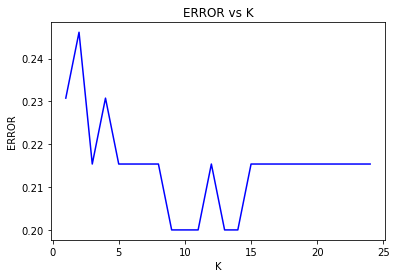

In [30]:
plt.plot(list(range(1,25)), err_list, c = "b")
plt.title("ERROR vs K")
plt.xlabel("K")
plt.ylabel("ERROR")
plt.show()

#NOTE : from the above graph we may select the K value as 9

# MODEL BUILDING

In [31]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# MODEL EVALUATION

In [32]:
confusion_matrix(Y_test, Y_pred)

array([[ 9, 10],
       [ 3, 43]], dtype=int64)

In [33]:
accuracy_score(Y_test, Y_pred)

0.8

# PICKLING

In [34]:
import pickle

In [35]:
filename = "save_model.sav"
pickle.dump(model, open(filename, "wb"))